In [90]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [91]:
df_Germany = df[df['job_country'] == 'Germany']
df_Germany

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
64,Senior Data Analyst,Senior Data Analyst,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-25 13:13:39,True,False,Germany,None,NaN,NaN,Stepstone GmbH,None,None
78,Senior Data Scientist,Senior Data Expert,"Berlin, Germany",via Jobs Trabajo.org,Full-time,False,Germany,2023-10-27 13:13:25,False,False,Germany,None,NaN,NaN,SIXT Germany,"[sql, excel, looker, sap]","{'analyst_tools': ['excel', 'looker', 'sap'], ..."
104,Software Engineer,Senior Software Engineer - Metadata,"Berlin, Germany",via Snowflake Careers,Full-time,False,Germany,2023-10-27 13:13:54,False,False,Germany,None,NaN,NaN,Snowflake,"[c++, java, snowflake]","{'cloud': ['snowflake'], 'programming': ['c++'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785728,Senior Data Scientist,"Senior Data Scientist, Operations Research",Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Wolt Oy,"[python, sql]","{'programming': ['python', 'sql']}"
785729,Data Engineer,Data Engineer Marketing Intelligence,Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,IU Internationale Hochschule,None,None
785732,Data Engineer,Data Engineer (f/m/d),"Heidelberg, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,None,NaN,NaN,Heidelberg Materials,"[python, c#, java, scala, sql, postgresql, sql...","{'cloud': ['azure', 'databricks'], 'databases'..."
785735,Senior Data Engineer,Senior Data Engineer,"Berlin, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:19:07,False,False,Germany,None,NaN,NaN,Pure App,"[sql, python, bigquery, aws, airflow, fastapi,...","{'cloud': ['bigquery', 'aws'], 'libraries': ['..."


In [92]:
df_skills = df_Germany.explode('job_skills')
df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
2,Data Engineer,python
2,Data Engineer,sql
2,Data Engineer,c#
2,Data Engineer,azure
2,Data Engineer,airflow
...,...,...
785735,Senior Data Engineer,docker
785737,Data Analyst,sas
785737,Data Analyst,sas
785737,Data Analyst,sql


Count skills per Job title

In [93]:
# group by job title and skill, count occurrences
df_skill_counts = df_skills.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skill_count')
df_skill_counts.sort_values(by='skill_count', ascending=False, inplace=True)
df_skill_counts

,job_title_short,job_skills,skill_count
679,Data Scientist,python,4157
500,Data Engineer,python,3524
530,Data Engineer,sql,3145
336,Data Analyst,sql,2947
312,Data Analyst,python,2309
...,...,...,...
374,Data Engineer,airtable,1
1209,Senior Data Scientist,vb.net,1
1211,Senior Data Scientist,visual basic,1
910,Senior Data Analyst,powerbi,1


create top 3 roles

In [94]:
job_titles = df_skill_counts['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3]) # top 3 in alphabetical order
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

Plot skill counts

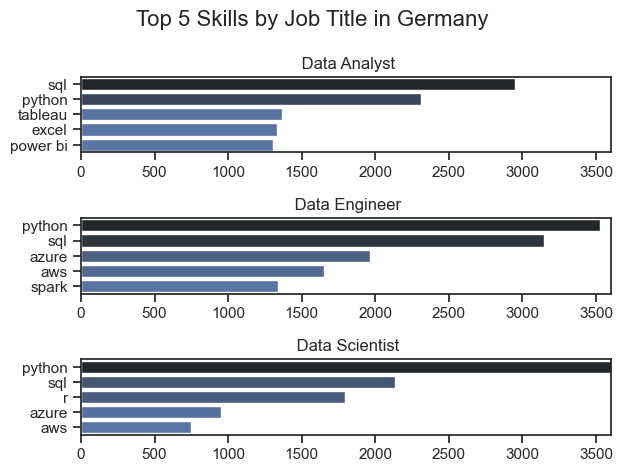

In [ ]:
# barchart for top 5 skills for each job title


fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    top_skills = df_skill_counts[df_skill_counts['job_title_short'] == job_title].head()[::-1]
    sns.barplot(x='skill_count', 
                y='job_skills', 
                data=top_skills, 
                ax=ax[i],
                hue='skill_count',
                palette='dark:b_r',
                )
    ax[i].set_title(f' {job_title}')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].invert_yaxis()
    ax[i].get_legend().remove() 
    ax[i].set_xlim(0, 3600)
fig.suptitle('Top 5 Skills by Job Title in Germany', fontsize=16)
plt.tight_layout()
plt.show()


Convert the counts to percentage

In [96]:
df_job_title_count = df_Germany['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,7131
1,Data Scientist,6745
2,Data Engineer,6675
3,Senior Data Engineer,2041
4,Senior Data Scientist,1737
5,Senior Data Analyst,1216
6,Business Analyst,817
7,Software Engineer,741
8,Machine Learning Engineer,402
9,Cloud Engineer,189


In [97]:
#df_skill_counts['percentage'] = df_skill_counts.groupby('job_title_short')['count'].transform(lambda x: x / x.sum() * 100)
df_skills_perc = pd.merge(df_skill_counts, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,4157,6745,61.630838
1,Data Engineer,python,3524,6675,52.794007
2,Data Engineer,sql,3145,6675,47.116105
3,Data Analyst,sql,2947,7131,41.326602
4,Data Analyst,python,2309,7131,32.379750
...,...,...,...,...,...
1377,Data Engineer,airtable,1,6675,0.014981
1378,Senior Data Scientist,vb.net,1,1737,0.057571
1379,Senior Data Scientist,visual basic,1,1737,0.057571
1380,Senior Data Analyst,powerbi,1,1216,0.082237


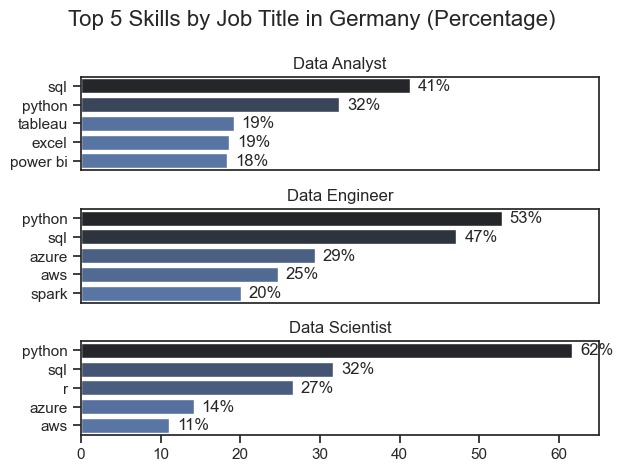

In [98]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    top_skills = (
        df_skills_perc[df_skills_perc['job_title_short'] == job_title]
        .sort_values(by='skill_percent', ascending=False)
        .head(5)
    )

    sns.barplot(
        x='skill_percent',
        y='job_skills',
        data=top_skills,
        ax=ax[i],
        hue='skill_percent',
        palette='dark:b_r',

    )
    
    ax[i].set_title(f'{job_title}')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 65)   # since it’s percentages
     # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # Add labels at the end of bars
    for n, v in enumerate(top_skills['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Top 5 Skills by Job Title in Germany (Percentage)', fontsize=16)
plt.tight_layout()
plt.show()

Nepal

In [103]:
df_Nepal = df[df['job_country'] == 'Nepal'].copy()
df_Nepal

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1746,Data Engineer,Data QA Engineer,"Lalitpur, Nepal",via Merojob,Full-time,False,Nepal,2023-08-09 14:04:23,True,False,Nepal,None,NaN,NaN,Cedar Gate Services,None,None
2925,Software Engineer,SQL Engineer,"Lalitpur, Nepal",via Merojob,Full-time,False,Nepal,2023-03-24 14:26:30,True,False,Nepal,None,NaN,NaN,Impetus Incorporation,[sql],{'programming': ['sql']}
21167,Data Analyst,"U-Report Data Analyst Consultant, UNICEF Regio...",Nepal,via UNJoblink Careers,Contractor,False,Nepal,2023-07-17 14:09:19,False,False,Nepal,None,NaN,NaN,United Nations Children's Fund (UNICEF),"[r, python, excel, tableau, flow]","{'analyst_tools': ['excel', 'tableau'], 'other..."
24730,Data Analyst,Data Analytics Manager,"Lalitpur, Nepal",via Merojob,Full-time,False,Nepal,2023-09-01 14:01:47,True,False,Nepal,None,NaN,NaN,Cedar Gate Services,None,None
26074,Data Analyst,Data Reporting Analyst – Power BI,Anywhere,via LinkedIn Nepal,Full-time,True,Nepal,2023-04-05 13:29:48,False,False,Nepal,None,NaN,NaN,Linkbridge Technologies Pvt. Ltd.,"[power bi, dax]","{'analyst_tools': ['power bi', 'dax']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775260,Data Engineer,Data Engineer,"Kathmandu, Nepal",via LinkedIn Nepal,Full-time,False,Nepal,2023-05-29 01:15:23,False,False,Nepal,None,NaN,NaN,Codavatar Tech Pvt. Ltd.,"[python, c++, java, r, sql, hadoop, gdpr]","{'libraries': ['hadoop', 'gdpr'], 'programming..."
776749,Data Engineer,Data Engineer,"Kathmandu, Nepal",via LinkedIn Nepal,Full-time,False,Nepal,2023-01-23 05:57:15,False,False,Nepal,None,NaN,NaN,Reputed IT Company,"[sql, t-sql, c#, python, vba, sql server, ssrs]","{'analyst_tools': ['ssrs'], 'databases': ['sql..."
779134,Data Engineer,Data Engineer,"Kathmandu, Nepal",via LinkedIn Nepal,Full-time,False,Nepal,2023-01-22 06:13:07,False,False,Nepal,None,NaN,NaN,Reputed Company,"[sql, t-sql, c#, python, vba, sql server, ssrs]","{'analyst_tools': ['ssrs'], 'databases': ['sql..."
779603,Software Engineer,Sr Software Engineer (.Net),"Kathmandu, Nepal",via SmartRecruiters Job Search,Full-time,False,Nepal,2023-01-12 05:42:44,False,False,Nepal,None,NaN,NaN,Verisk,"[c#, javascript, sql, postgresql, aws, asp.net...","{'analyst_tools': ['sharepoint'], 'cloud': ['a..."


In [108]:
df_skill = df_Nepal.explode('job_skills')
df_skill[['job_skills', 'job_title_short']]

,job_skills,job_title_short
1746,None,Data Engineer
2925,sql,Software Engineer
21167,r,Data Analyst
21167,python,Data Analyst
21167,excel,Data Analyst
...,...,...
781229,c#,Data Engineer
781229,python,Data Engineer
781229,vba,Data Engineer
781229,sql server,Data Engineer


In [111]:
df_skill_count = df_skill.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skill_count')
df_skill_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skill_count

,job_title_short,job_skills,skill_count
110,Data Engineer,python,42
119,Data Engineer,sql,41
191,Machine Learning Engineer,python,34
199,Machine Learning Engineer,tensorflow,21
192,Machine Learning Engineer,pytorch,21
...,...,...,...
81,Data Engineer,excel,1
226,Senior Data Engineer,github,1
228,Senior Data Engineer,jira,1
78,Data Engineer,docker,1


In [ ]:
job_title = df